# K-Nearest Neighbors (KNN) Models

K-Nearest Neighbors (KNN) is a versatile algorithm often used in machine learning for both classification and regression. It's conceptually simple: it classifies new data points based on how closely they resemble data points in the training set.

KNN operates on a simple principle: it finds the $k$ closest training examples to the new input, also known as neighbors, and predicts the output based on these neighbors. With KNN, the entire training dataset essentially becomes the model.

## Classification
For classification tasks, KNN assigns the class label based on a majority vote among the $k$ nearest neighbors. Each neighbor votes for their class, and the class with the most votes is the prediction made by the model.

## Regression
For regression, KNN predicts the output based on the average of the values of its $k$ nearest neighbors.

## Distance Metric
The algorithm uses a distance metric to find the closest neighbors. The most common distance metric is the Euclidean distance, which for two points $p$ and $q$ with coordinates `(p1, p2,..., pn)` and `(q1, q2,..., qn)` is defined as:

$$ d(p, q) = \sqrt{\sum_{i=1}^n (q_i - p_i)^2} $$

## Choosing the Right $k$
Choosing the right $k$ is crucial for KNN's performance. The most common way to choose k is trial and error and see which value of $k$ minimizes our MSE. Typically, as $k$ converges towards 1, we will get less accurate predictions (since we are considering less points when making our predictions) and as $k$ increases, its prediction accuracy will increase up until a certain point $K$ and then decrease for all values past $K$. This $K$ then represents our optimal $k$-value. 

## Advantages and Disadvantages

There are a variety of advantages and disadvantages of using a KNN model when making predictions:

### Advantages
- **Simplicity**: KNN is very easy to understand and implement.
- **Nonparametric**: It makes no assumptions about the underlying data distribution, which is useful with real-world data.
- **Versatility**: Can be used for classification, regression, and even search (in recommendation systems, for instance).

### Disadvantages
- **Scalability**: KNN can be slow to predict if the dataset is large, as it searches through all the training data.
- **Curse of Dimensionality**: Performance degrades with a high number of features unless dimensionality reduction is performed.
- **Sensitivity to Irrelevant Features**: KNN is sensitive to irrelevant or redundant features because all the features contribute to the distance calculation.
- **Data with varying scales**: Requires feature scaling for good performance.

In [2]:
#Classification

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data has been loaded and 'high_salary' column created
df = pd.read_csv("salary.csv")
median_salary = df['Salary'].median()
df['high_salary'] = (df['Salary'] >= median_salary).astype(int)

# Selecting features and the target
X = df[["MP", "3P"]].values
y = df["high_salary"].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train_scaled, y_train)

# Making predictions
y_pred = knn.predict(X_test_scaled)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7304964539007093
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        70
           1       0.77      0.66      0.71        71

    accuracy                           0.73       141
   macro avg       0.74      0.73      0.73       141
weighted avg       0.74      0.73      0.73       141

Confusion Matrix:
[[56 14]
 [24 47]]


As we can see and based on our output, our KNN model predicts our salary classifier very well with around 73% accuracy which is significantly better than our neural network model and single perceptron model which hovered around 30% when it came to predictor our salary classifier. 

Optimal k: k = 8


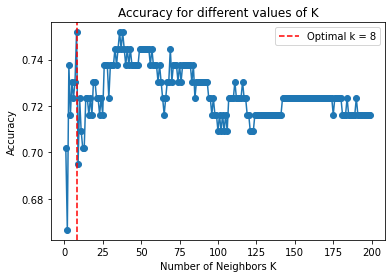

Accuracy: 0.75177304964539


In [22]:
import matplotlib.pyplot as plt

# Initialize a list to store accuracies
accuracies = []

# Train and evaluate a KNN model for each k from 1 to 20
for k in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred_k)
    accuracies.append(acc)

# Determine the k that leads to the highest accuracy
optimal_k = accuracies.index(max(accuracies)) + 1  # +1 because index is 0-based and k starts from 1

# Print the optimal k value
print(f"Optimal k: k = {optimal_k}")

# Plot the accuracies for different values of k to visualize
plt.plot(range(1, 200), accuracies, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('Accuracy for different values of K')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()
plt.show()

print(f"Accuracy: {max(accuracies)}")



As expected, as we change the number of neighbors $k$, we will get varying levels of accuracy. According to the plot above, our optimal accuracy occurs when $k$ = 8 

In [5]:
#Now let's use KNN for regression

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X = df[['3P', 'MP']]
y = df['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Displaying actual vs predicted values for better understanding
comparison = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': y_pred})
print(comparison)


Mean Squared Error: 94391566339273.3
Root Mean Squared Error: 9715532.22110211
     Actual Salary  Predicted Salary
55        21177750      2.043238e+07
63        19500000      2.451272e+07
33        30913750      2.043238e+07
462          35096      5.983200e+06
72        17207142      1.920527e+07
..             ...               ...
297        2239200      3.376594e+06
234        3613680      9.855037e+06
29        33000000      2.260891e+07
157        7350000      4.320227e+06
204        4591680      3.647893e+06

[141 rows x 2 columns]


Our RMSE yields an interesting result -- while our KNN classifier model was a way better model than our neural network model when it came to classifying, when we fit our KNN regression model, our RMSE was higher than it was for our neural network model. Given the complex relationship between salary and our various predictors as we've explored, neural networks are generally more flexible and powerful in capturing complex patterns and interactions in the data, especially when the relationships are non-linear and the data volume is large. This might explain why the neural network has a better RMSE in regression; it can approximate the function relating inputs to continuous outputs more effectively than KNN.